## This is part of HDSC22: Real Life Machine Learning Projects (Hamoye) Stage-B dedicated to logistic regression.

## PP22/W608 

### Historical-Hourly-Weather-Data
### Scope: Weather
### Topic: Historical Hourly Weather Data 2012–2017
### Project Description:
#### The weather is an excellent way to illustrate basic signal processing concepts, such as filtering, Fourier transform, auto-correlation, cross-correlation. The dataset contains a five year high temporal resolution (hourly measurements) data of various weather attributes, such as temperature, humidity, air pressure, etc., from about 30 cities across the US and Canada.

### Conributor : P Alagu Prakalya
### Date : 08.02.2022

## Exploratory Data Analysis on Albuquerque and Beersheba

### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Import the necessary Libraries

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

plt.style.use('bmh')

### We have in total 30 citiy's weather data in which we will explore it's attribute(location), humidity, pressure, temperature, description of the weather and the speed, direction of the wind in the repestive data frames df[1...7]

In [2]:
df1=pd.read_csv('city_attributes.csv')

In [3]:
df1.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [4]:
a=df1.loc[df1['City'] == 'Albuquerque']

In [5]:
b=df1.loc[df1['City'] == 'Beersheba']

### Using the plotly express we locate the cities Barsheeba and Albuquerque in a physical layer map

In [27]:

fig = px.density_mapbox(b, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")   
fig.show()


In [8]:
fig = px.density_mapbox(a, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()


## Pre-processing of the data : 
### Reseeting index to datetime, for the purpose of visualisation and checking and replacing for null values in the data

In [82]:
df2=pd.read_csv('humidity.csv',index_col='datetime', parse_dates=['datetime'])
df2 = df2.iloc[1:]
df2.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


#### Visualising null values using seaborn plot

<AxesSubplot:>

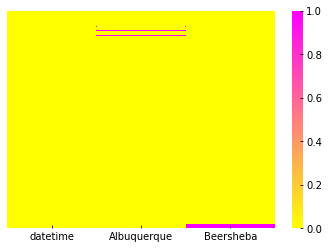

In [71]:
sns.heatmap(df2.isnull(),yticklabels=False,cmap='spring_r')

In [83]:
df2=df2.fillna(method='ffill')

#### No more null values observed

<AxesSubplot:>

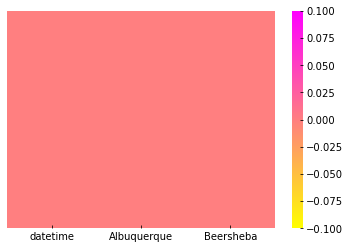

In [49]:
sns.heatmap(df2.isnull(),yticklabels=False,cmap='spring_r')


In [74]:
df2.set_index('datetime')

,Albuquerque,Beersheba
datetime,,
2012-10-01 13:00:00,50.0,50.0
2012-10-01 14:00:00,49.0,51.0
2012-10-01 15:00:00,49.0,51.0
2012-10-01 16:00:00,49.0,52.0
2012-10-01 17:00:00,49.0,54.0
...,...,...
2017-11-29 20:00:00,37.0,57.0
2017-11-29 21:00:00,34.0,57.0
2017-11-29 22:00:00,32.0,57.0


### A time-series plot on humidity of the two cities

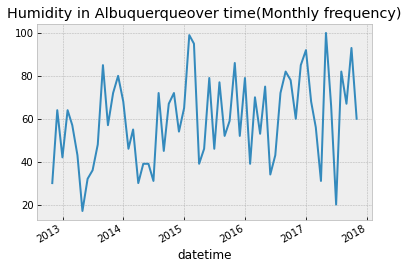

In [86]:
df2["Albuquerque"].asfreq('M').plot() 
plt.title('Humidity in Albuquerqueover time(Monthly frequency)')
plt.show()

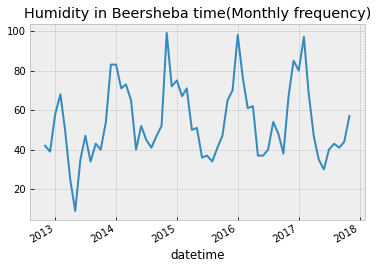

In [87]:
df2["Beersheba"].asfreq('M').plot() 
plt.title('Humidity in Beersheba time(Monthly frequency)')
plt.show()

### From the above plots it's observable that Albuquerque does under go rapid humidity change it might because of "As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases" as stated by scientists, whereas Beersheba had undergone seasonal changes though no lowest humidty is recorded after the mid-2013

In [88]:
selected_col=df2[["Albuquerque","Beersheba"]]
df2=selected_col.copy()

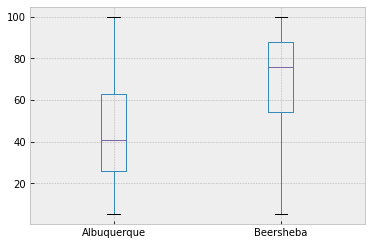

In [207]:
df2.plot.box();

#### A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). A  graph that gives you a good indication of how the values in the data are spread out. Here, we could observe humidity of Beersheba is higher than the relative and both are equally spread.

### Read the rest of the datas using pandas

In [91]:
df3=pd.read_csv('pressure.csv',index_col='datetime', parse_dates=['datetime'])
df4=pd.read_csv('temperature.csv',index_col='datetime', parse_dates=['datetime'])
df5=pd.read_csv('weather_description.csv',index_col='datetime', parse_dates=['datetime'])
df6=pd.read_csv('wind_direction.csv',index_col='datetime', parse_dates=['datetime'])
df7=pd.read_csv('wind_speed.csv',index_col='datetime', parse_dates=['datetime'])

### Following are the relative subplots of the two cities w.r.t Pressure and Temperature

<AxesSubplot:title={'center':' Beersheba'}, xlabel='datetime'>

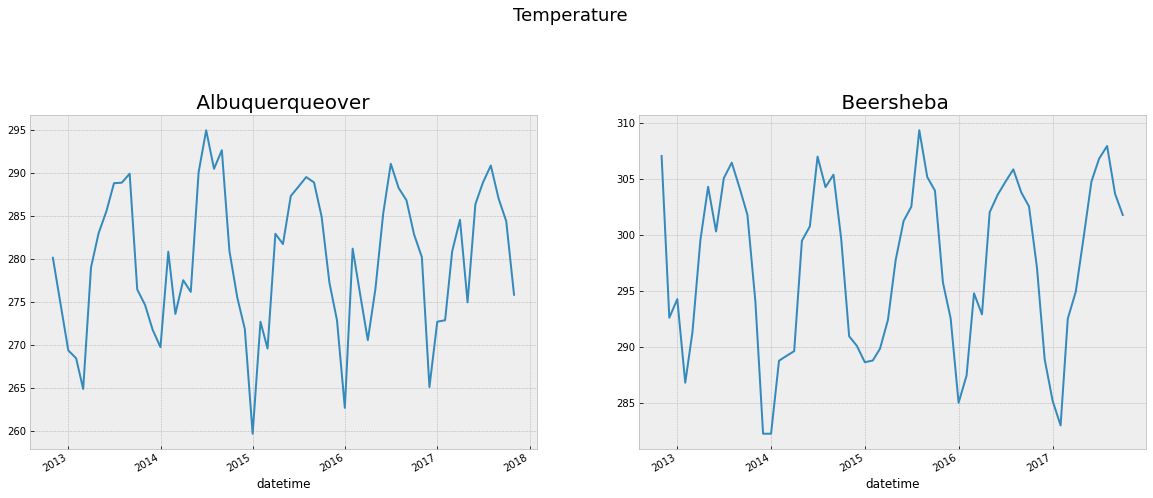

In [148]:
plt.figure(figsize=(20,15))
plt.suptitle('Temperature',fontsize=18)
ax1=plt.subplot(2,2,1)
ax1.set_title(' Albuquerqueover ', fontsize=20)
df4["Albuquerque"].asfreq('M').plot()
ax=plt.subplot(2,2,2)
ax.set_title(' Beersheba', fontsize=20)
df4["Beersheba"].asfreq('M').plot()

#### Areas of high and low pressure are caused by ascending and descending air. As air warms it ascends, leading to low pressure at the surface. As air cools it descends, leading to high pressure at the surface.

<AxesSubplot:title={'center':' Beersheba'}, xlabel='datetime'>

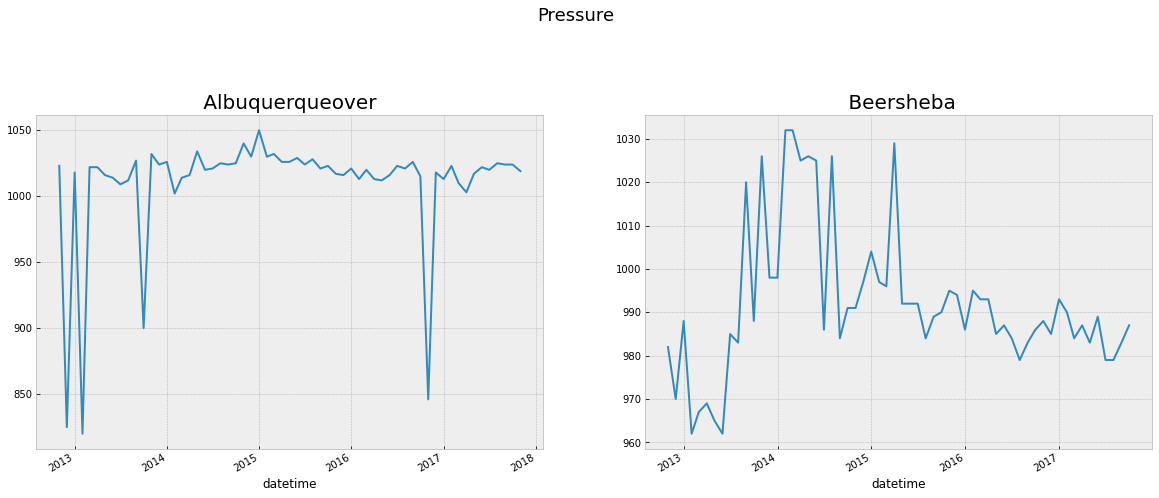

In [149]:
plt.figure(figsize=(20,15))
plt.suptitle('Pressure',fontsize=18)
ax1=plt.subplot(2,2,1)
ax1.set_title(' Albuquerqueover ', fontsize=20)
df3["Albuquerque"].asfreq('M').plot()
ax=plt.subplot(2,2,2)
ax.set_title(' Beersheba', fontsize=20)
df3["Beersheba"].asfreq('M').plot()

#### Though w.r.t Temperature both the cities have similar seasonal change, with regards to pressure Albuquerque had shown a stable higher pressure from 2014to 16 past mid unlike Beersheba.

#### As per : https://www.weather.gov/abq/climonhigh2017annual-top5 had indicated how 2017 had affected from the climate change.

### A histogram is very similar to bar charts. This chart is a combination of a line chart and a vertical bar chart. The data here is displayed with the help of equally sized rectangles. A histogram is used to display the distribution of information or data over a continuous time period. The area of the rectangular bars is proportional to the frequency of the variable.

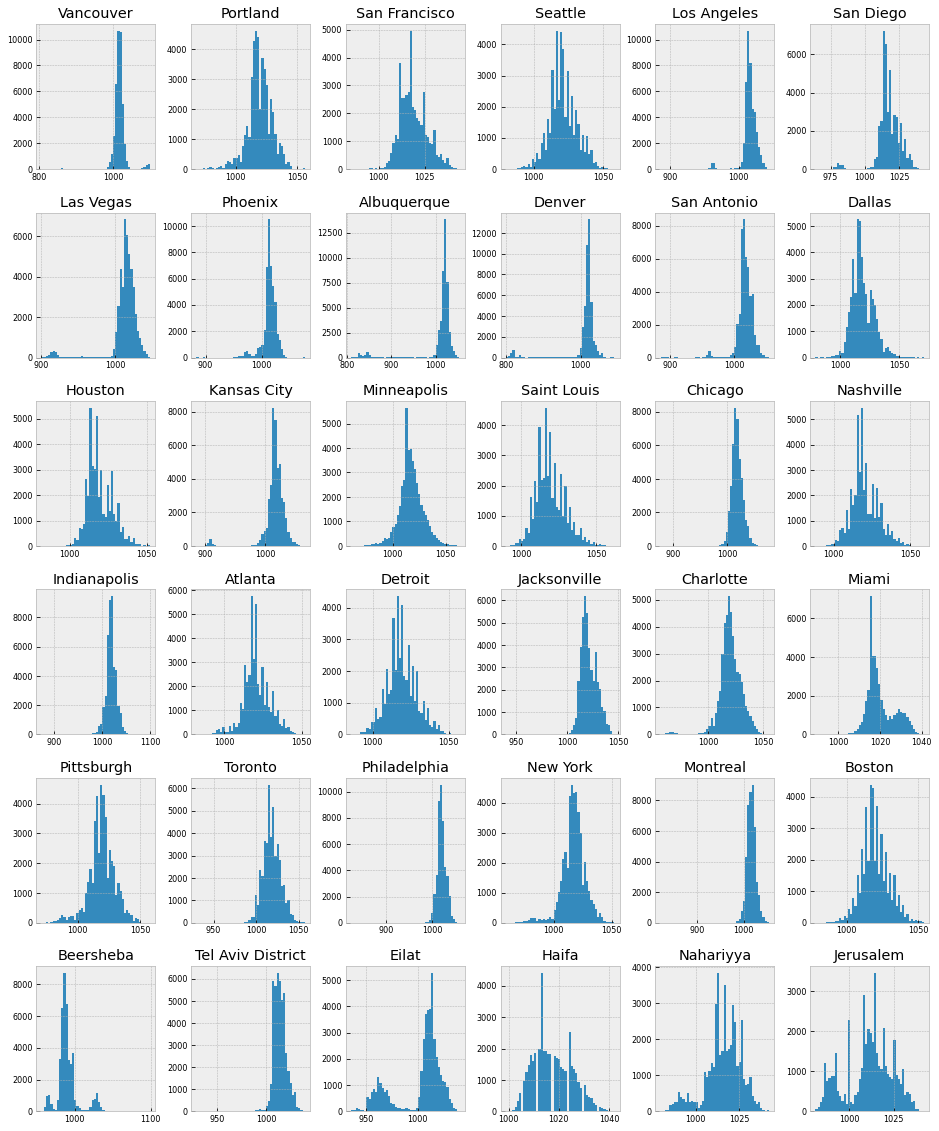

In [193]:
df3.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Dist plots of Temperature along with the summary

count    44455.000000
mean       291.521986
std          7.821815
min        272.179000
25%        285.366623
50%        290.932667
75%        297.270000
max        314.820000
Name: Beersheba, dtype: float64


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



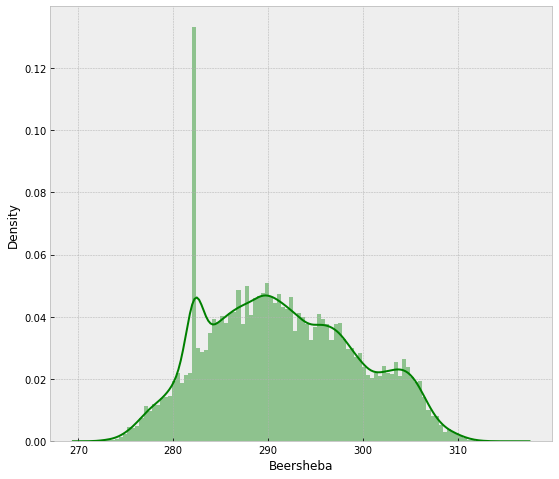

In [191]:
print(df4['Beersheba'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df4['Beersheba'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    45252.000000
mean       285.617856
std          9.853484
min        255.042333
25%        277.970000
50%        286.120000
75%        292.835643
max        312.710000
Name: Albuquerque, dtype: float64


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



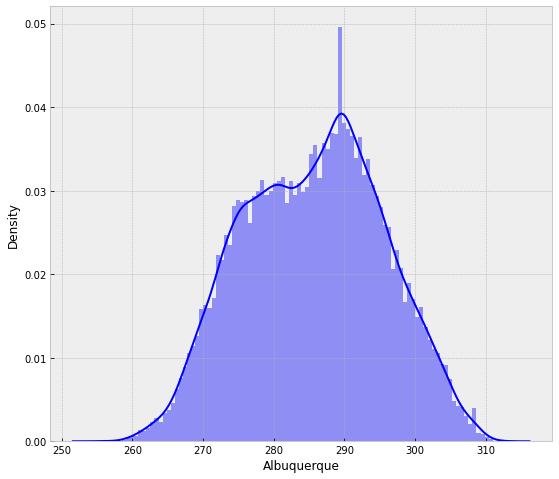

In [192]:
print(df4['Albuquerque'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df4['Albuquerque'], color='b', bins=100, hist_kws={'alpha': 0.4});

### Hexbin visualised for temperature

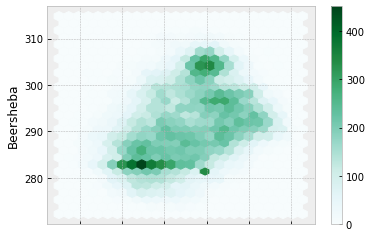

In [213]:
df4.plot.hexbin(x ="Albuquerque",y="Beersheba", gridsize=25);

### Since description of the weather is of categorical variable we'll first explore word cloud, which denoted the maximum appearance of the words from a city respectively in each city

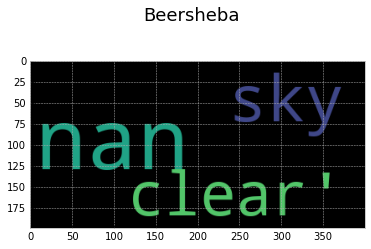

In [165]:
text = df5['Beersheba'].values 

wordcloud = WordCloud().generate(str(text))
plt.suptitle('Beersheba',fontsize=18)

plt.imshow(wordcloud)
plt.show()

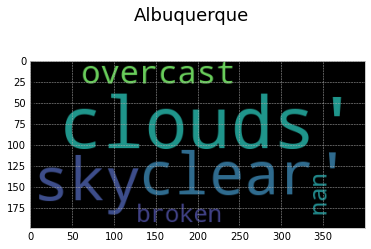

In [164]:
text =df5["Albuquerque"].values 

wordcloud = WordCloud().generate(str(text))
plt.suptitle('Albuquerque',fontsize=18)

plt.imshow(wordcloud)
plt.show()

### After preprocessing the data (null values) count plot is visualised and later in the extension of the project creation and manipulation of dummy variables will be introduced

In [172]:
selected_col=df5[["Albuquerque","Beersheba"]]
df5=selected_col.copy()
df5 = df5.dropna()
#df5 = df5.reset_index(drop = True)

In [175]:
df5

,Albuquerque,Beersheba
datetime,,
2012-10-01 13:00:00,sky is clear,sky is clear
2012-10-01 14:00:00,sky is clear,sky is clear
2012-10-01 15:00:00,sky is clear,overcast clouds
2012-10-01 16:00:00,sky is clear,overcast clouds
2012-10-01 17:00:00,sky is clear,overcast clouds
...,...,...
2017-10-27 20:00:00,broken clouds,sky is clear
2017-10-27 21:00:00,few clouds,sky is clear
2017-10-27 22:00:00,few clouds,sky is clear


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'sky is clear'),
  Text(1, 0, 'overcast clouds'),
  Text(2, 0, 'few clouds'),
  Text(3, 0, 'broken clouds'),
  Text(4, 0, 'light rain'),
  Text(5, 0, 'scattered clouds'),
  Text(6, 0, 'moderate rain'),
  Text(7, 0, 'heavy intensity rain')])

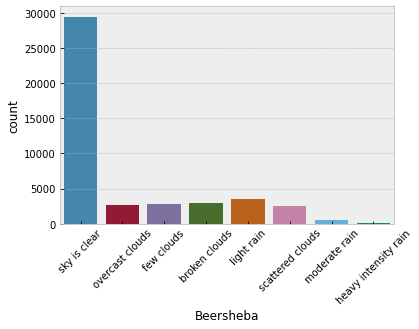

In [182]:
sns.countplot(data = df5, x = 'Beersheba')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'sky is clear'),
  Text(1, 0, 'few clouds'),
  Text(2, 0, 'scattered clouds'),
  Text(3, 0, 'broken clouds'),
  Text(4, 0, 'overcast clouds')])

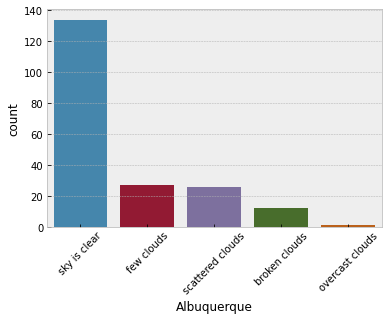

In [186]:
sns.countplot(data = df5[:200], x = 'Albuquerque')
plt.xticks(rotation=45)


## Finally exploring the wind speed and direction of the cities

In [195]:
df6.head(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,20.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,22.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0


In [197]:
selected_col=df6[["Albuquerque","Beersheba"]]
df6=selected_col.copy()
df6 = df6.dropna()
#df5 = df5.reset_index(drop = True)


#### Null values removed 

<AxesSubplot:xlabel='datetime'>

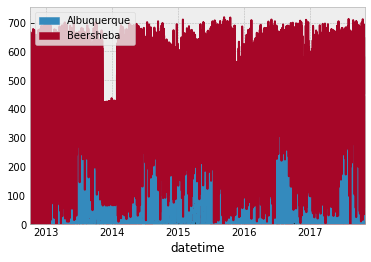

In [200]:
df6.plot.area()


### An area chart combines the line chart and bar chart to show how one or more groups' numeric values change over the progression of a second variable, typically that of time.

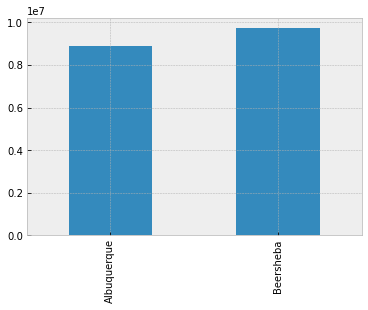

In [201]:
df6.sum().plot.bar();

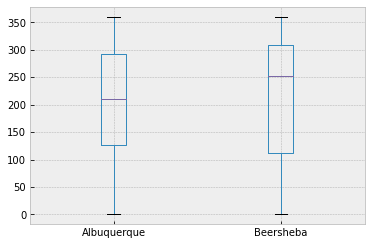

In [206]:
df6.plot.box();

### Wind direction is read pre-processed and a scatter plot and a histogram is plotted respectively

In [196]:
df7.head(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


### A histogram allows you to see the frequency distribution of a data set. 

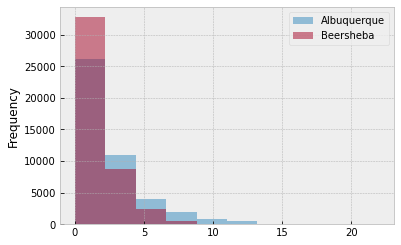

In [202]:
selected_col=df7[["Albuquerque","Beersheba"]]
df7=selected_col.copy()
df7 = df7.dropna()
#df5 = df5.reset_index(drop = True)
df7.plot.hist(alpha=0.5);

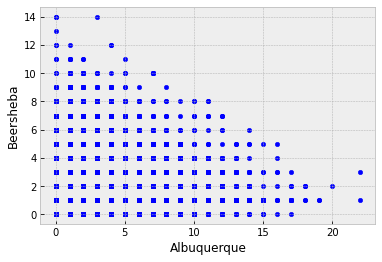

In [205]:
df7.plot.scatter(x ="Albuquerque",y="Beersheba");

### Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

## In this notebook we have done Pre-processing of the data and had performed an exploratory data analysis along with possible forms of data visualisation for the cities Beersheba and Albuquerque with the help of https://www.kaggle.com/selfishgene/historical-hourly-weather-data.